# Centrální limitní věta

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

### Porovnáme histogram součtu $n$ nezávislých exponenciálních veličin s aproximací na základě centrální limitní věty.

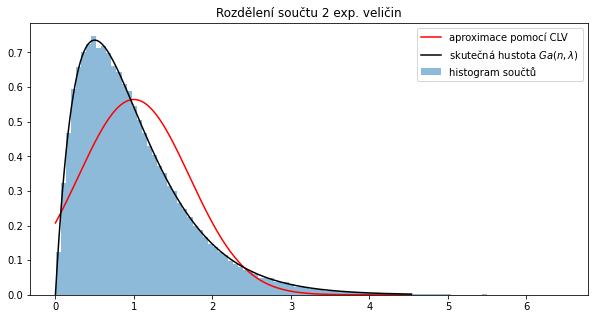

In [5]:
n   = 2      # počet sčítanců   
lam = 2      # parametr exponenciálních veličin
k   = 100000 # počet realizací součtů

# N náhodných vzorky součtů k exponenciálních veličin
r = stats.expon.rvs(scale=1/lam, size=(n, k)).sum(axis=0)

mu     = n*1/lam      # střední hodnota součtu
sigma2 = n*1/lam**2   # rozptyl součtu

plt.figure(figsize=(10, 5))
plt.hist(r, bins=100, density=True, alpha=0.5, label='histogram součtů');
xs = np.linspace(0, mu+5*sigma2**0.5, 200)
plt.plot(xs, stats.norm.pdf(xs, loc=mu, scale=sigma2**0.5), color='red', label='aproximace pomocí CLV')
plt.plot(xs, stats.gamma.pdf(xs, n, scale=1/lam), 'k', label='skutečná hustota $Ga(n, \lambda)$')
plt.title('Rozdělení součtu {} exp. veličin'.format(n))
plt.legend();